#Support Vector Machines

## Visualizing Support Vectors, Margin, and Hyperplane in SVM

This example given below demonstrates how to visualize the support vectors, the decision boundary (hyperplane), and the margins in an SVM classifier using Python.

## Dataset
We will create a synthetic dataset using `make_blobs` from Scikit-Learn to generate two classes that can be separated by a linear boundary.

##Steps:

1) Dataset Generation: We use make_blobs to create a simple two-class dataset. This dataset has 100 samples divided into two centers, making it suitable for visualization.

2) SVM Model: We instantiate an SVM classifier with a linear kernel and fit it to our data.
2a) Support Vectors: After fitting, we retrieve the support vectors and their indices.
2b) Decision Boundary and Margins: We create a mesh grid that spans the range of our dataset. The decision function of the classifier calculates the distance from the hyperplane for every point in the mesh. We use contour plots to visualize the decision boundary (where the function is zero) and margins (where the function equals ±1).
2c) Plotting: We plot the decision boundary, margins, support vectors (highlighted with green circles), and the data points in different colors based on their class labels.

3) Visual Outcome:
When you run this code, it produces a plot that shows: The decision boundary (the line where the decision function is zero).
The margins (the regions where the decision function is ±1).
Support vectors marked as green circles, which are the data points closest to the decision boundary and crucial for defining it.


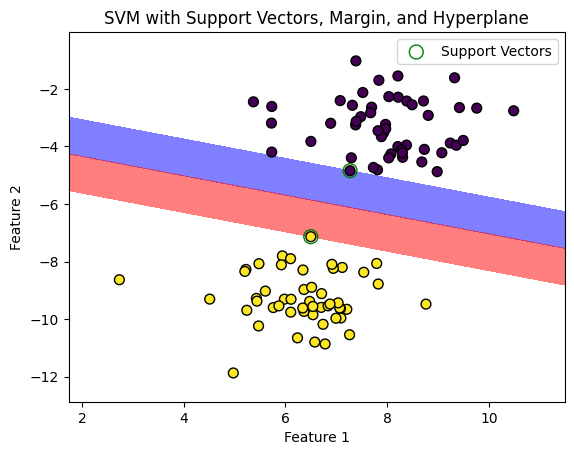

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate synthetic dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get support vectors
support_vectors = clf.support_vectors_
sv_indices = clf.support_

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))

# Calculate decision boundary and margins
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='green', s=100, label='Support Vectors')

# Plot the hyperplane
plt.title("SVM with Support Vectors, Margin, and Hyperplane")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()


# Example 2:

1) Dataset Generation: We use make_moons to create a synthetic two-class dataset that is not linearly separable. This function generates two interleaving half circles, creating a non-linear pattern.

2) SVM Model: We instantiate an SVM classifier with an RBF kernel and fit it to our data.
- Support Vectors: After fitting, we retrieve the support vectors, which are the data points that lie closest to the decision boundary.
- Decision Boundary and Margins: We create a mesh grid covering the feature space and calculate the decision function. The contour plot helps visualize the decision boundary and the margins.

3) Plotting: We plot the decision boundary, margins, and support vectors (highlighted with green circles). The decision boundary will curve to separate the two classes effectively.

When you run this code, it produces a plot that shows:

The non-linear decision boundary created by the SVM with the RBF kernel.
The margins (the regions where the decision function equals ±1).
Support vectors marked as green circles, which are crucial for defining the decision boundary.

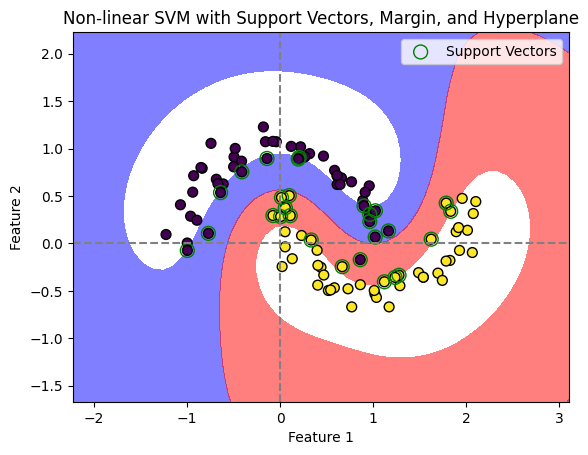

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate synthetic dataset (moons)
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=6)

# Create an SVM classifier with RBF kernel
clf = svm.SVC(kernel='rbf', C=1.0)
clf.fit(X, y)

# Get support vectors
support_vectors = clf.support_vectors_

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))

# Calculate decision boundary and margins
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='green', s=100, label='Support Vectors')

# Plot the hyperplane
plt.title("Non-linear SVM with Support Vectors, Margin, and Hyperplane")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()


# Investigate the impact of noise on the performance of an SVM model

Let's use the make_moons dataset, and then

1) Generate the original dataset without noise.

2) Train an SVM model on this dataset and visualize the decision boundary.

3) Introduce noise to the dataset and repeat the training and visualization.

4) Compare the performance metrics (e.g., accuracy, F1-score) for both models.

## Step 1: Original Dataset Without Noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate synthetic dataset (moons) without noise
X, y = datasets.make_moons(n_samples=100, noise=0.0, random_state=6)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with RBF kernel
clf_no_noise = svm.SVC(kernel='rbf', C=1.0)
clf_no_noise.fit(X_train, y_train)

# Make predictions
y_pred_no_noise = clf_no_noise.predict(X_test)

# Calculate performance metrics
accuracy_no_noise = accuracy_score(y_test, y_pred_no_noise)
f1_no_noise = f1_score(y_test, y_pred_no_noise)

print(f'Accuracy without noise: {accuracy_no_noise:.2f}')
print(f'F1 Score without noise: {f1_no_noise:.2f}')


Accuracy without noise: 1.00
F1 Score without noise: 1.00


## Step 2: Visualize Decision Boundary Without Noise

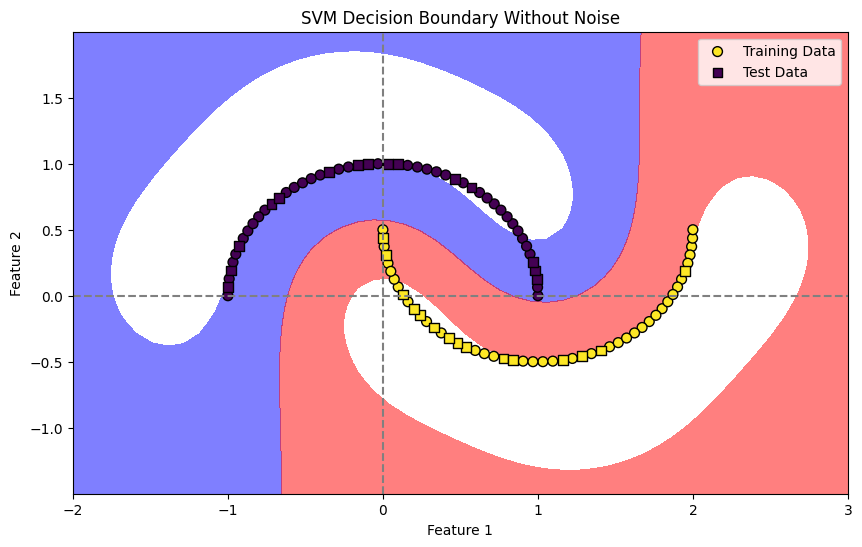

In [ ]:
# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))

# Calculate decision boundary
Z_no_noise = clf_no_noise.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_no_noise = Z_no_noise.reshape(xx.shape)

# Plot the decision boundary without noise
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_no_noise, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', s=50, label='Test Data')
plt.title("SVM Decision Boundary Without Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()


## Step 3: Introduce Noise to the Dataset

In [ ]:
# Generate synthetic dataset (moons) with noise
X_noisy, y_noisy = datasets.make_moons(n_samples=100, noise=0.1, random_state=6)

# Split the noisy dataset into training and testing sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.3, random_state=42)

# Train an SVM model with RBF kernel on noisy data
clf_with_noise = svm.SVC(kernel='rbf', C=1.0)
clf_with_noise.fit(X_train_noisy, y_train_noisy)

# Make predictions on noisy data
y_pred_with_noise = clf_with_noise.predict(X_test_noisy)

# Calculate performance metrics
accuracy_with_noise = accuracy_score(y_test_noisy, y_pred_with_noise)
f1_with_noise = f1_score(y_test_noisy, y_pred_with_noise)

print(f'Accuracy with noise: {accuracy_with_noise:.2f}')
print(f'F1 Score with noise: {f1_with_noise:.2f}')


Accuracy with noise: 0.97
F1 Score with noise: 0.97


## Step 4: Visualize Decision Boundary With Noise

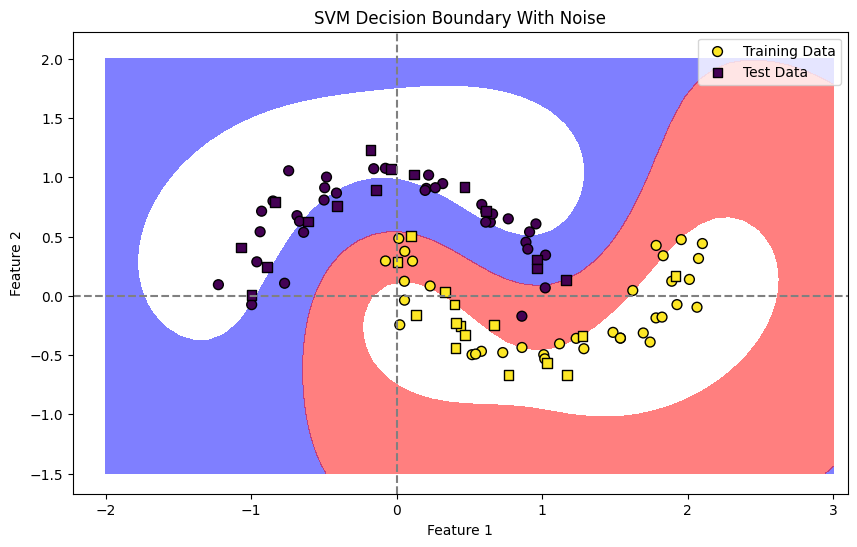

In [ ]:
# Create a mesh grid for visualization
Z_with_noise = clf_with_noise.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_with_noise = Z_with_noise.reshape(xx.shape)

# Plot the decision boundary with noise
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_with_noise, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c=y_train_noisy, edgecolors='k', marker='o', s=50, label='Training Data')
plt.scatter(X_test_noisy[:, 0], X_test_noisy[:, 1], c=y_test_noisy, edgecolors='k', marker='s', s=50, label='Test Data')
plt.title("SVM Decision Boundary With Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X_noisy[:, 0].min() - 1, X_noisy[:, 0].max() + 1)
plt.ylim(X_noisy[:, 1].min() - 1, X_noisy[:, 1].max() + 1)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()


## Summary of Results

After running the code, you can analyze and discuss the results:

### Performance Metrics:
Compare the accuracy and F1 scores of the SVM models with and without noise. Generally, you should expect the performance metrics to be lower for the model trained on the noisy dataset.

### Visual Comparison:
Examine the decision boundaries visually. The model trained without noise should exhibit a clearer separation between the classes, while the model trained with noise may have a more complex decision boundary, potentially indicating overfitting.

# Exercise

## Exploring Kernel Differences

To understand how different SVM kernels affect classification performance and to visualize decision boundaries for linear and non-linear datasets.

A) Dataset: You can use the popular Iris dataset or generate a synthetic dataset using make_moons or make_circles from sklearn.datasets.

B) Data Preparation: Load the dataset using sklearn.datasets.
If using the Iris dataset, select two features for a 2D visualization (e.g., sepal length and sepal width). Split the dataset into training and testing sets (e.g., 70% train, 30% test).

C) Create a function to train and visualize SVM with different kernels.
Experiment with Different Kernels:

D) Call the function for each kernel type: ['linear', 'poly', 'rbf', 'sigmoid']

E) After visualizing the decision boundaries, evaluate the performance of each SVM model on the test set.

##Discussion Questions:

1) How do the decision boundaries change with different kernel types?

2) Which kernel provided the best performance based on the classification report? Why do you think that is?

3) What are the advantages and disadvantages of using non-linear kernels compared to a linear kernel?